Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2084
           1       0.98      0.85      0.91       316

    accuracy                           0.98      2400
   macro avg       0.98      0.92      0.95      2400
weighted avg       0.98      0.98      0.98      2400



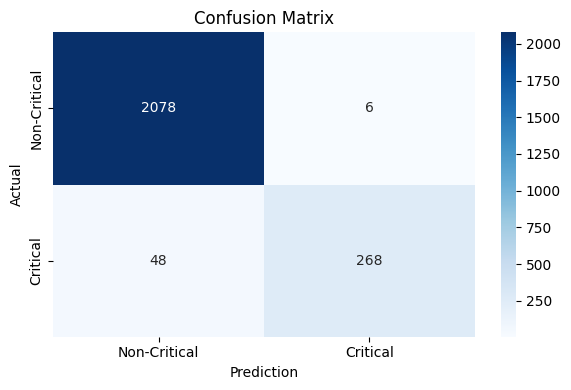

Modelo guardado como 'modelo_zona_critica.pkl'


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Datos/sensores.csv", parse_dates=["timestamp"])
X = df[["temperatura", "humedad", "co2"]]
y = df["zona_critica"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1989)
modelo = RandomForestClassifier(n_estimators=100, random_state=1989)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Critical", "Critical"],
    yticklabels=["Non-Critical", "Critical"]
)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
joblib.dump(modelo, "modelo_zona_critica.pkl")
print("Modelo guardado como 'modelo_zona_critica.pkl'")